In [1]:
import numpy as np
import datajoint as dj
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd

In [2]:
dj.conn(host='vfsmdatajoint01.fsm.northwestern.edu', user='OfficeDesktop')
dj.config['stores'] = {
    'raw': {
        'protocol':'file',
        'location':r'\\fsmresfiles.fsm.northwestern.edu\fsmresfiles\Ophthalmology\Research\SchwartzLab\Datajoint\raw',
    }
}
symphony = dj.create_virtual_module(module_name='symphony', schema_name='sln_symphony')
cells = dj.create_virtual_module(module_name='cells', schema_name='sln_cell')

[2024-10-10 11:15:36,083][INFO]: Connecting OfficeDesktop@vfsmdatajoint01.fsm.northwestern.edu:3306
[2024-10-10 11:15:36,164][INFO]: Connected OfficeDesktop@vfsmdatajoint01.fsm.northwestern.edu:3306


In [16]:
cell_name = "100824Ac1"
my_cell = symphony.Experiment.Cell().proj(cell_name='concat(file_name, "c", cell_number)') & f'cell_name="{cell_name}"'

In [17]:
symphony.Dataset.Epoch() & my_cell

file_name,source_id,dataset_name,epoch_group_id,epoch_block_id,epoch_id
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,10
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,11
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,12
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,13
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,14
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,15
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,16
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,17
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,18
100824A,3,SpotsMultiSize_Cell_attached_Current_clamp,1,2,19


In [23]:
tn = symphony.Experiment.ProtTemporalNoiseV1bp() * \
    symphony.Experiment.ProtTemporalNoiseV1ep() * \
    (symphony.SpikeTrain() * (symphony.Dataset.Epoch() & my_cell) & 'channel_name="Amp1"')\
    * symphony.Experiment.Channel()\
    * symphony.Experiment.Epoch()\
    * symphony.Experiment.ProjectorSettings()
# tn
tn_data = tn.fetch(format='frame')
tn_data

antialias  \
file_name source_id epoch_group_id epoch_block_id epoch_id channel_name dataset_name                                                    
100824A   3         2              3              46       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  47       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  48       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  49       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  50       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  51       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  52       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  53       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                                  54       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_60...        1.0   
                                   4              55       Amp1         TemporalNoise_Cell_attached_Current_clamp_ns_1_...        1.0   
                                                  56       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_2_...        1.0   
                                                  57       Amp1         TemporalNoise_Cell_attached_Current_clamp_ns_1_...        1.0   
                                                  58       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_2_...        1.0   
                                                  59       Amp1         TemporalNoise_Cell_attached_Current_clamp_ns_1_...        1.0   
                                                  60       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_2_...        1.0   
                                   5              61       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                                  62       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                                  63       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                                  64       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                                  65       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                                  66       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                                  67       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_4_...        1.0   
                                   6              68       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_8_...        1.0   
                                                  69       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_8_...        1.0   
                                                  70       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_8_...        1.0   
                                                  71       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_8_...        1.0   
                                                  72       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_8_...        1.0   
                                                  73       Amp1         TemporalNoise_Cell_attached_Current_clamp_fd_8_...        1.0   
              

In [30]:
for i,trial in tn_data.iterrows():
    # print(int(trial.noise_seed), end=',')
    # print(trial)
    # break
    print(int(trial.frame_dwell), end=',')

60,60,60,60,60,60,60,60,60,2,2,2,2,2,2,4,4,4,4,4,4,4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,15,15,15,15,15,15,15,15,15,4,

In [31]:
for i,trial in tn_data.iterrows():
    # print(int(trial.noise_seed), end=',')
    print(trial)
    # break
    # print(int(trial.frame_dwell), end=',')

antialias                                                                 1.0
aperture                                                                200.0
color_noise_distribution                                             gaussian
color_noise_mode                                                    1 pattern
contrast                                                                 0.36
frame_dwell                                                              60.0
mean_level                                                                0.0
number_of_epochs                                                           30
pre_time                                                                  0.0
rstar_mean                                                                0.0
seed_change_mode                                           repeat & increment
seed_start_value                                                          1.0
spot_mean_level                                                 

In [52]:
def getStim(trial):
    # 1) create the random generator stream using the seed
    noiseGen = np.random.RandomState(seed=int(trial.noise_seed))
    
    preFrames = int(trial.frame_rate * trial.pre_time / 1000)
    stimFrames = int(trial.frame_rate * trial.stim_time / 1000)
    tailFrames = int(trial.frame_rate * trial.tail_time / 1000)
    # nFrames = preFrames + stimFrames + tailFrames
    
    # 2) draw random values  and convert to gaussian
    nFrames = stimFrames // int(trial.frame_dwell)
    randVals = noiseGen.rand(nFrames, 2)
    randVals = np.sqrt(-2*np.log(randVals[:,0])) * np.cos(2*np.pi*randVals[:,1])
    
    # 4) add on mean, std, pre/tail time, frame_dwell, etc.
    
    contrast = randVals * trial.contrast # relative to spot mean level
    luminance = trial.spot_mean_level * (1 + contrast)
    
    # TODO: np.clip()
    
    if trial.mean_level:
        contrast_c = (luminance - trial.mean_level) / trial.mean_level # relative to the background level
        
        mean_c = (trial.spot_mean_level - trial.mean_level) / trial.mean_level
                
        # NOTE:
        # Weber contrast:
        # contrast -> luminance =  mean + contrast * mean = (1+contrast) * mean
        # luminance -> contrast = (luminance - mean)/mean    
    else: # luminance mode
        contrast_c = luminance
        mean_c = trial.spot_mean_level
    
    return np.concatenate((
        np.ones(preFrames) * mean_c,
        contrast_c,
        np.ones(tailFrames) * mean_c,
    ))

In [53]:
for i,trial in tn_data.iterrows():
    # print(int(trial.noise_seed), end=',')
    print(trial.noise_seed)
    # break
    # print(int(trial.frame_dwell), end=',')
    s = getStim(trial)
    break
    

1.0
[-2.45178515e-01 -1.37581663e+00  1.63849808e+00 -1.03583895e+00
 -1.31946925e+00 -5.22029907e-01  1.28436440e+00 -1.28535111e+00
 -1.23319704e+00  6.34782299e-01  6.53441481e-01 -5.40030568e-01
  4.05125116e-01  2.15366333e+00  1.35755310e+00 -1.89449429e+00
 -2.86989528e-01 -3.43425749e-01  4.39759772e-01  2.56517651e-03
 -1.72505454e-03  3.89564191e-01 -2.01792133e+00 -1.18489809e-01
  1.08024003e+00 -1.21441586e+00 -1.71876407e-01  1.12539688e+00
  6.36612910e-01 -3.19279855e-01]


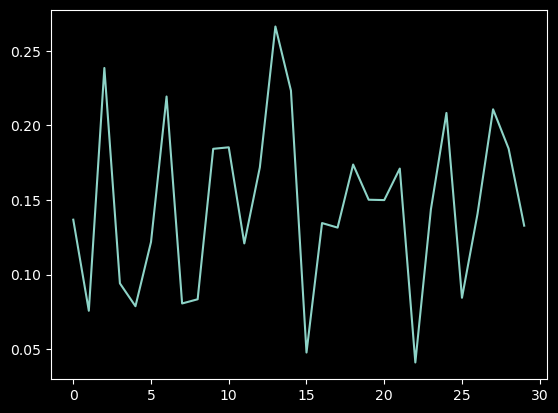

In [50]:
plt.plot(s)